In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [116]:
las = lasio.read('C:\\Users\\ASUS\\Desktop\\1051661161.LAS')
df = las.df()
# print(df['RHOB'])
df['GR'] = df.index

In [117]:
df.describe()

,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
count,5541.000000,5541.000000,5540.000000,5466.000000,5466.000000,5466.000000,5467.000000,5541.000000,5541.000000,5541.000000,...,5509.000000,5512.000000,5512.000000,5541.000000,5541.000000,5540.000000,5494.000000,5497.000000,5498.000000,5498.000000
mean,0.012272,0.021115,139.910654,18.085643,25.871001,25.780431,28.638905,1580.000000,-68.668264,1102.225995,...,8.144689,12.399068,11.671000,0.078506,95.111759,33.603773,8.274458,38.845337,0.070521,14.762778
std,0.119540,0.155831,92.053635,9.482882,11.012485,9.751341,8.460903,799.846626,21.135791,239.228427,...,1.625604,16.065711,17.501263,0.292151,23.985427,16.963060,3.818390,1907.225020,0.077172,9.044476
min,0.000000,0.000000,0.000000,-10.381000,-27.299300,-41.596500,-11.857700,195.000000,-92.380000,602.327200,...,-65.767800,-1.594000,-1.891200,0.000000,-2.492400,-35.426000,4.473900,-2.556100,-3.184200,-82.064400
25%,0.000000,0.000000,78.501300,11.179700,20.364025,20.364025,23.832050,887.500000,-85.370000,898.337000,...,8.010900,4.126400,2.798975,0.000000,80.095700,22.989725,7.998800,2.385200,0.040800,8.676750
50%,0.000000,0.000000,118.398800,19.443600,28.286950,28.280950,30.826900,1580.000000,-77.990000,1120.542400,...,8.133300,7.358100,5.537800,0.000000,96.999000,34.937400,8.123650,2.464800,0.059700,14.353900
75%,0.000000,0.000000,183.443200,24.192075,32.062125,32.052275,34.632600,2272.500000,-37.020000,1322.002300,...,8.362700,11.108925,10.935250,0.000000,108.288300,42.920950,8.350400,2.562000,0.088400,18.975050
max,2.000000,2.000000,674.211400,200.707200,400.581900,250.748200,51.426600,2965.000000,-1.720000,1520.791500,...,12.344800,142.340500,164.806500,2.000000,238.234000,134.819000,173.585200,100000.000000,0.270500,158.479500


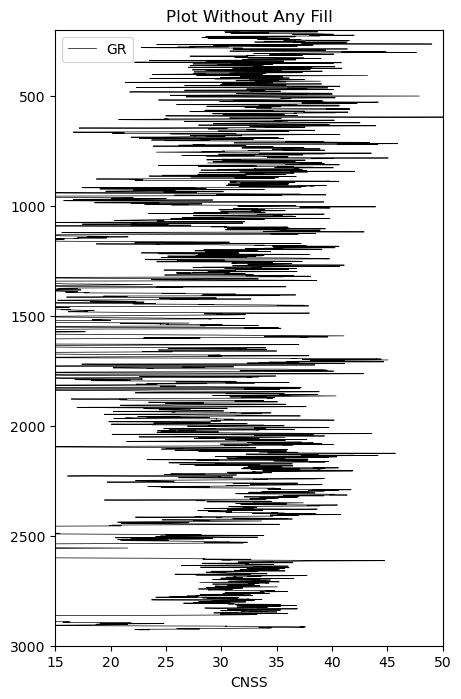

In [118]:
df.plot(x='CNSS', y='GR', c='black', lw=0.5, legend=True, figsize=(5,8))

plt.ylim(3000, 200)
plt.xlim(15,50)
plt.title('Plot Without Any Fill')
plt.show()

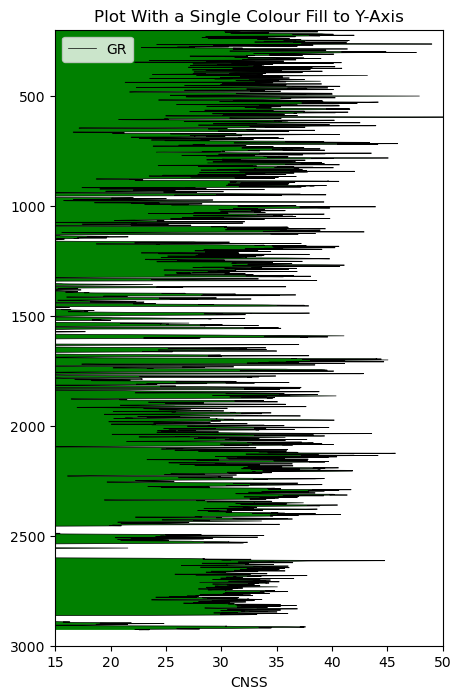

In [119]:
df.plot(x='CNSS', y='GR', c='black', lw=0.5, legend=True, figsize=(5,8))

plt.fill_betweenx(df['GR'], df['CNSS'], 0, facecolor='green')
plt.ylim(3000, 200)
plt.xlim(15,50)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

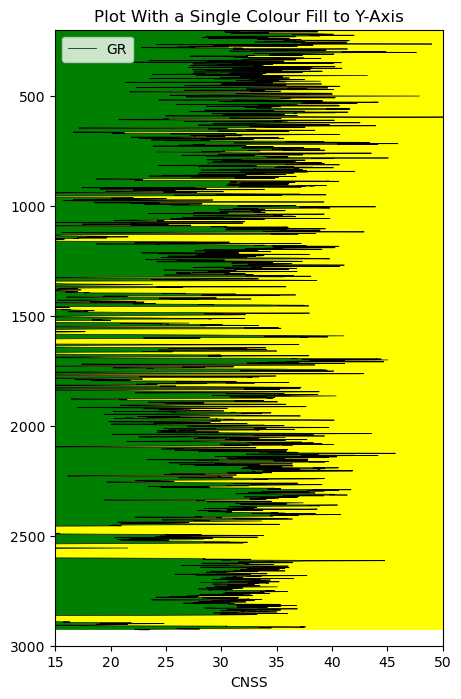

In [120]:
df.plot(x='CNSS', y='GR', c='black', lw=0.5, legend=True, figsize=(5,8))

plt.fill_betweenx(df['GR'], df['CNSS'], 0, facecolor='green')
plt.fill_betweenx(df['GR'], df['CNSS'], 150, facecolor='yellow')

plt.ylim(3000, 200)
plt.xlim(15,50)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

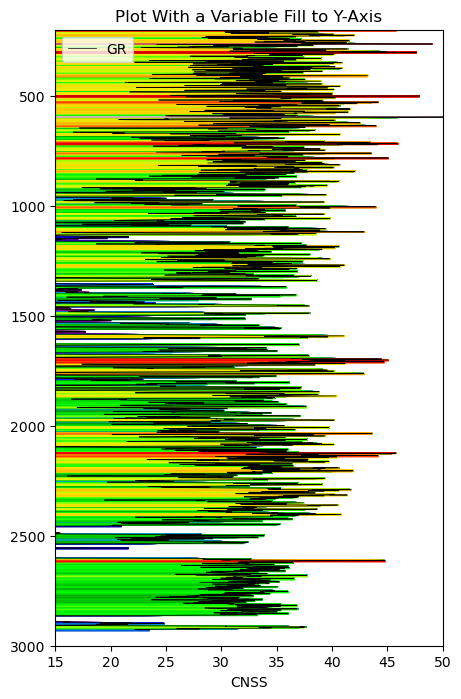

In [121]:
left_col_value = 15
right_col_value = 50

#assign the column to a variable for easier reading
curve = df['CNSS']

#calculate the span of values
span = abs(left_col_value - right_col_value)

#assign a color map
cmap = plt.get_cmap('nipy_spectral')

#create array of values to divide up the area under curve
color_index = np.arange(left_col_value, right_col_value, span / 100)

#setup the plot
df.plot(x='CNSS', y='GR', c='black', lw=0.5, legend=True, figsize=(5,8))
plt.ylim(3000, 200)
plt.xlim(left_col_value, right_col_value)
plt.title('Plot With a Variable Fill to Y-Axis')

#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(df['GR'], 0 , curve, where = curve >= index,  color = color)
    
plt.show()

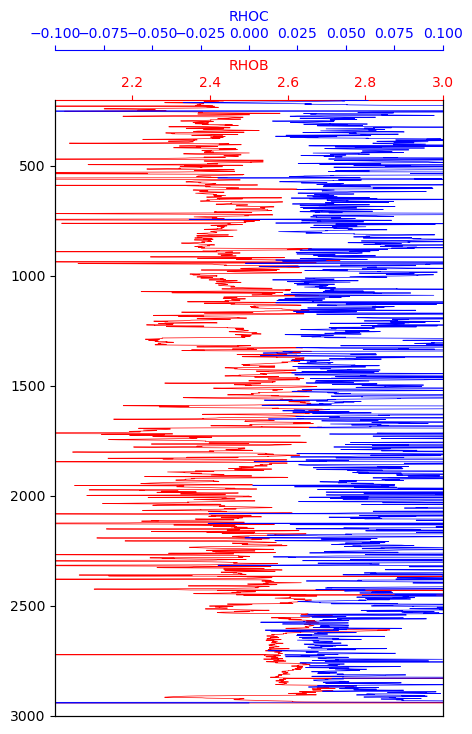

In [122]:
fig = plt.subplots(figsize=(5,8))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('RHOB', 'GR', data=df, color='red', lw=0.5)
ax1.set_xlim(2.001, 3.0)
ax1.set_xlabel('RHOB')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('RHOC', 'GR', data=df, color='blue', lw=0.5)
ax2.set_xlim(-0.1, 0.1)
ax2.set_xlabel('RHOC')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")


for ax in [ax1, ax2]:
    ax.set_ylim(3000, 200)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

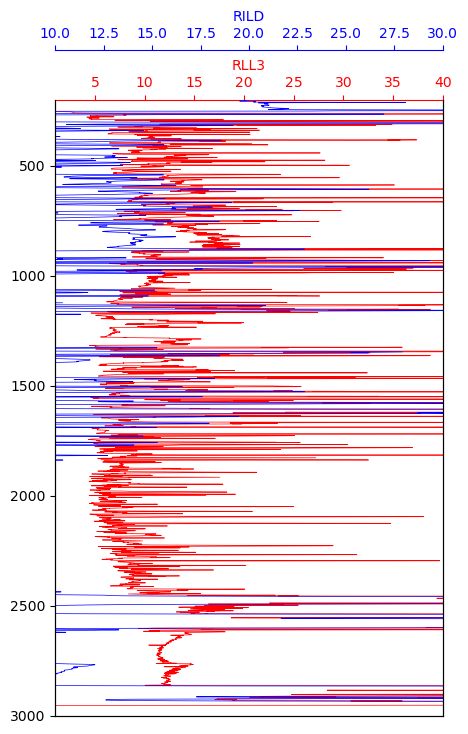

In [123]:
fig = plt.subplots(figsize=(5,8))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('RLL3', 'GR', data=df, color='red', lw=0.5)
ax1.set_xlim(1, 40)
ax1.set_xlabel('RLL3')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('RILD', 'GR', data=df, color='blue', lw=0.5)
ax2.set_xlim(10, 30)
ax2.set_xlabel('RILD')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")


for ax in [ax1, ax2]:
    ax.set_ylim(3000, 200)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

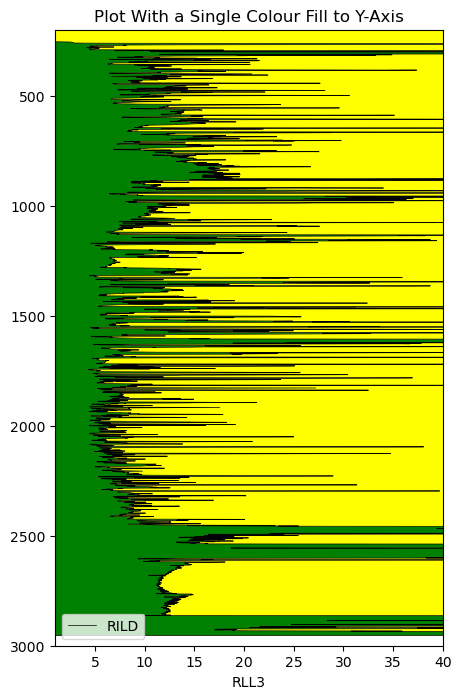

In [124]:
df['RILD'] = df.index

df.plot(x='RLL3', y='RILD', c='black', lw=0.5, legend=True, figsize=(5,8))

plt.fill_betweenx(df['RILD'], df['RLL3'], 0, facecolor='green')
plt.fill_betweenx(df['RILD'], df['RLL3'], 150, facecolor='yellow')

plt.ylim(3000, 200)
plt.xlim(1,40)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

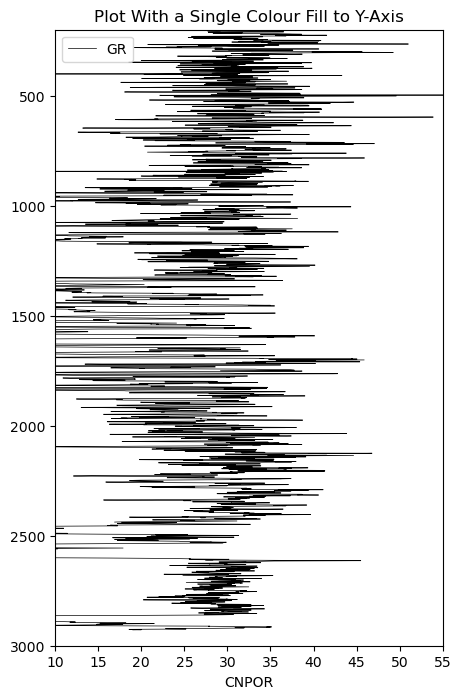

In [125]:
df.plot(x='CNPOR', y='GR', c='black', lw=0.5, legend=True, figsize=(5,8))

plt.ylim(3000, 200)
plt.xlim(10,55)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()